# Code up and then test the following things:

--- 

1. [done] sample from priors: M$_*$, SFR, tx 
2. [done] sample from priors: M$_*$, SFR, tx, Av, Z, z
4. [done] generate an SFH
5. [done] generate a spectrum with M*, SFR, tx, Av, Z, z inputs
6. import a filterset
7. generate an SED with a given filterset
9. make a pre-grid
10. fit an observed SED w/ pre-grid, single Nparam
11. fit an observed SED w/ MCMC, single Nparam
12. fit an observed SED w/ nested sampling, single Nparam
14. vary Nparam, perform model selection w/ BIC
15. vary Nparam, perform model selection w/ evidence

In [1]:
import matplotlib.pyplot as plt
import dense_basis as db

Initialized stellar population with FSPS.


In [2]:
# print priors
db.print_priors()

The prior on log mass is uniform from 9.0 to 12.0
The prior on log SFR_inst is uniform from -1.0 to 2.0
The prior on redshift is uniform from 0.9 to 1.1
The prior on log metallicity/Zsolar is uniform from -1.5 to 0.5
The prior on dust (model: Calzetti) is uniform from 0.0 to 1.0


[ 1.16785805e+01 -4.06058410e-03  4.00000000e+00  1.67553489e-01
  2.64492007e-01  5.09955466e-01  5.78252027e-01]


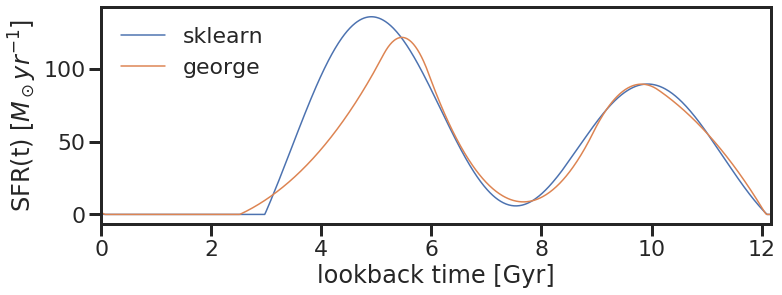

In [3]:
# sample from priors: M*, SFR, tx, Av, Z, z

rand_sfh_tuple = db.sample_sfh_tuple(random_seed = 6, Nparam = 4)
print(rand_sfh_tuple)

rand_sfh, rand_time = db.gp_sfh_sklearn(rand_sfh_tuple, zval = 0.1)
fig = db.plot_sfh(rand_time, rand_sfh, lookback=True, label='sklearn');

rand_sfh, rand_time = db.gp_sfh_george(rand_sfh_tuple, zval = 0.1)
db.plot_sfh(rand_time, rand_sfh, lookback=True, fig=fig, label='george');

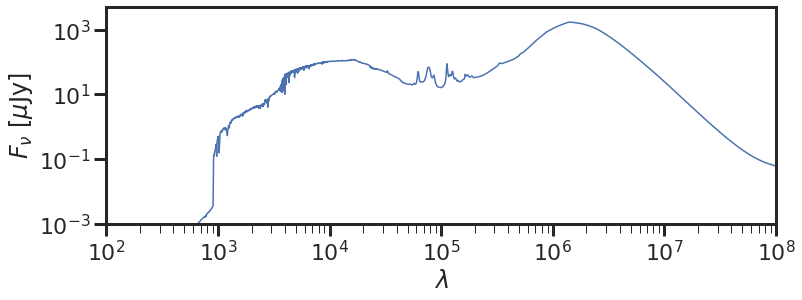

In [4]:
rand_sfh_tuple, rand_Z, rand_Av, rand_z = db.sample_all_params(random_seed = 15, Nparam = 1)
rand_spec, rand_lam = db.make_spec(rand_sfh_tuple, rand_Z, rand_Av, rand_z, return_lam = True)

db.plot_spec(rand_lam, rand_spec)

# check prior distributions

100%|██████████| 10000/10000 [00:00<00:00, 61682.76it/s]


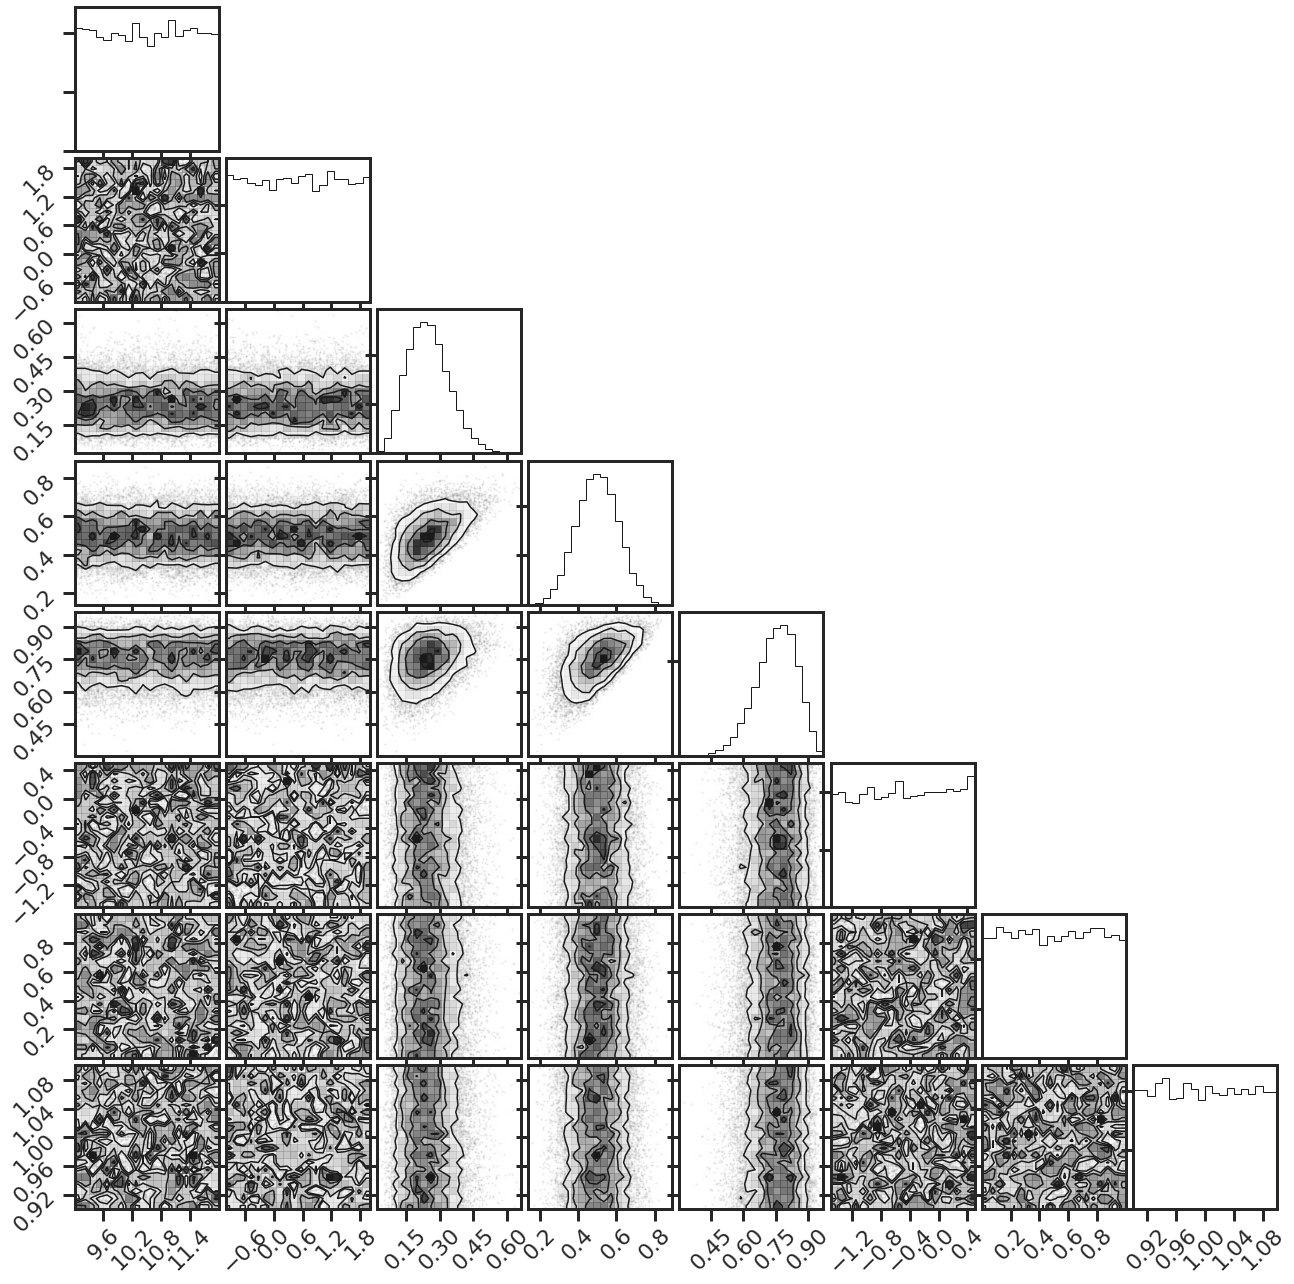

In [2]:
import numpy as np
from tqdm import tqdm
import corner

N_samples = 10000
Nparam = 3

rand_sfh_tuples = np.zeros((Nparam+3, N_samples))
rand_Zs = np.zeros((N_samples,))
rand_Avs = np.zeros((N_samples,))
rand_zs = np.zeros((N_samples,))

for i in tqdm(range(N_samples)):
    rand_sfh_tuples[0:,i], rand_Zs[i], rand_Avs[i], rand_zs[i] = db.sample_all_params(random_seed = 15+i, Nparam = Nparam)
    
theta = np.vstack([rand_sfh_tuples[0,0:], rand_sfh_tuples[1,0:], rand_sfh_tuples[3:3+Nparam,0:], rand_Zs, rand_Avs, rand_zs])
    
corner.corner(theta.T)
plt.show()

100%|██████████| 100000/100000 [00:02<00:00, 42409.87it/s]


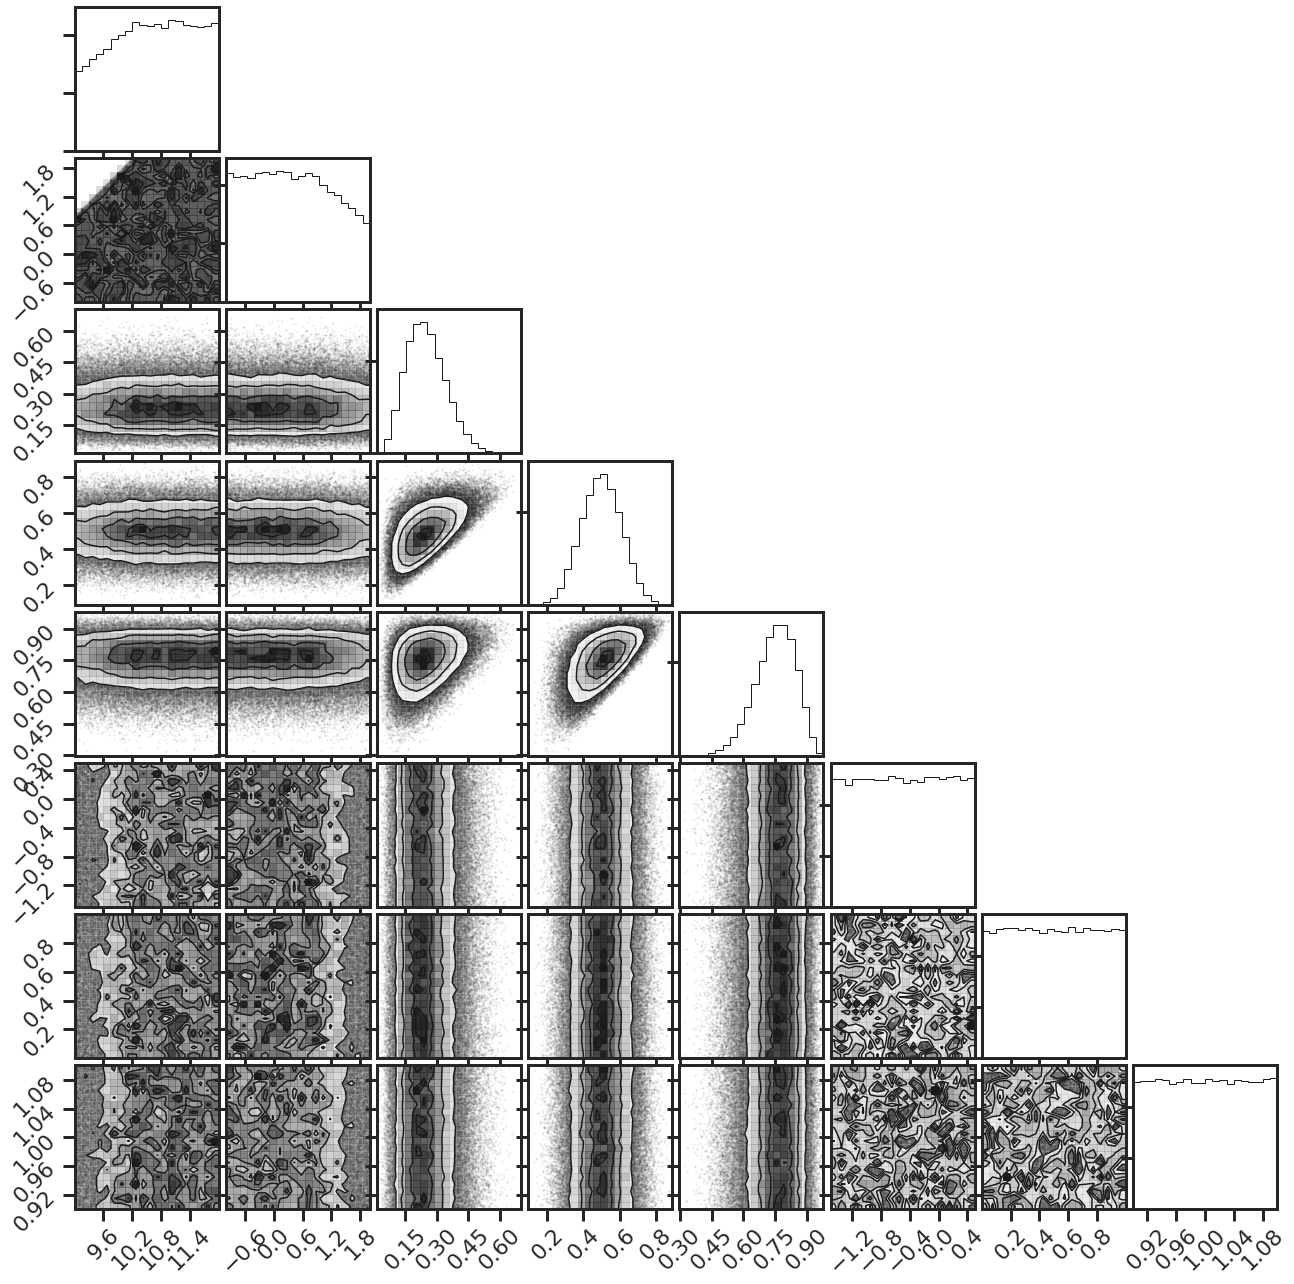

In [2]:
import numpy as np
from tqdm import tqdm
import corner

N_samples = 100000
Nparam = 3

rand_sfh_tuples = np.zeros((Nparam+3, N_samples))
rand_Zs = np.zeros((N_samples,))
rand_Avs = np.zeros((N_samples,))
rand_zs = np.zeros((N_samples,))

for i in tqdm(range(N_samples)):
    rand_sfh_tuples[0:,i], rand_Zs[i], rand_Avs[i], rand_zs[i] = db.sample_all_params_safesSFR(random_seed = 15+i, Nparam = Nparam)
    
theta = np.vstack([rand_sfh_tuples[0,0:], rand_sfh_tuples[1,0:], rand_sfh_tuples[3:3+Nparam,0:], rand_Zs, rand_Avs, rand_zs])
    
corner.corner(theta.T)
plt.show()